<a href="https://colab.research.google.com/github/ShrungaM/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Importing the necessary libraries and reading the file**

In [266]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [267]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [268]:
#Importing Dataset

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/datasets/SeoulBikeData.csv",encoding='latin1')

#Path for Sneha

# dataset = pd.read_csv("/content/drive/MyDrive/Data/SeoulBikeData.csv",encoding='latin1')

#**Data Exploration**

In [269]:
#First look of data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [270]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [271]:
#Taking a look at statistics of the columns
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [272]:
#Familiarise with the columns in the dataset and their data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [273]:
# Finding Any Null Value Present in the data set
dataset.isnull().values.any()

False

There are No Null values / missing values.

In [274]:
# checking for duplicate
len(dataset[dataset.duplicated()])

0

There are no duplicated values aswell.

In [275]:
dataset.shape

(8760, 14)

This Dataset contains 8760 rows and 14 columns. Since we don't have any missing/ duplicate values will be retaining all the rows as of now.

In [276]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

#**Data Preprocessing**

Splitting up of "Date" column

In [277]:
#Column Date 
#Splitting up "Date" column into "year","month","day" columns
dataset['Date'] = dataset['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [278]:
# creating different columns for month, day and year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()
dataset['year'] = dataset['Date'].dt.year

In [279]:
dataset['weekday']=dataset['day'].apply(lambda x : 0 if x=='Saturday' or x=='Sunday' else 1 )

We have splitted up "Date" column into day,month and year. So, "Date" column is no longer needed. Since we have created "weekday" column out of day. "day" column is no longer needed. Let's drop bothof these columns.

In [280]:
dataset=dataset.drop(columns=['Date','day'],axis=1)

This dataset contains data from 2017 dec to 2018 Nov. i.e, 1 year of data. So, we don't need year column. Let's drop it.

In [281]:
dataset.drop(columns=['year'],axis=1,inplace=True)

In [282]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

"Hour","month","weekday" - datatype of these columns are shown has int, but actually these are categorical data. So, let's convert the datatype.

In [283]:
#Changing datatype
#Change the int64 column into category column
cols=['Hour','month','weekday']
for col in cols:
  dataset[col]=dataset[col].astype('object')

In [284]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   objec

In [285]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


#**Exploratory Data Analysis**

##Analysis of Dependent variable.

First will look into our dependent variable i.e, Rented Bike count.


Rented Bike count gives us the information of number of bikes rented per hour

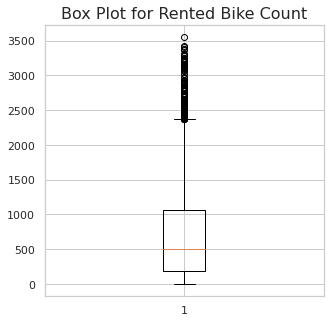

In [286]:
plt.figure(figsize=(5,5))
plt.title("Box Plot for Rented Bike Count",fontsize=16)
plt.boxplot(dataset['Rented Bike Count'])
plt.show()

In [287]:
#Considering the value above 3500 as an outlier, lets drop it.
dataset.drop(dataset[dataset['Rented Bike Count']>3500].index,axis=0,inplace=True)

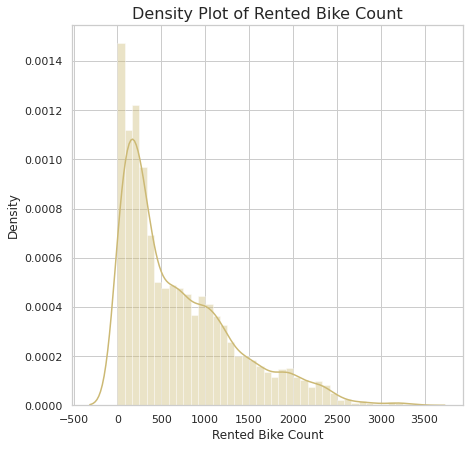

In [288]:
plt.figure(figsize=(7,7))
plt.title("Density Plot of Rented Bike Count",fontsize=16)
sns.distplot(dataset['Rented Bike Count'],color="y")
plt.show()

Through density plot we got know that it is right skewed, so to remove skewness we will be applying square root.

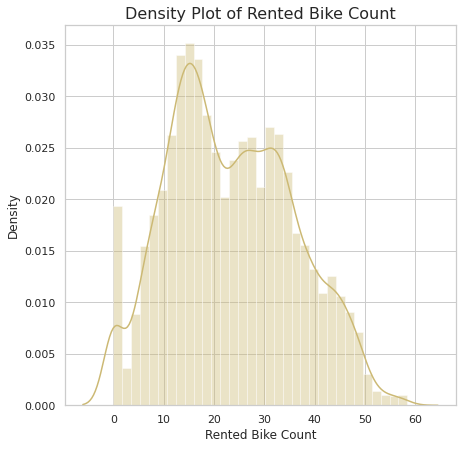

In [289]:

plt.figure(figsize=(7,7))
plt.title("Density Plot of Rented Bike Count",fontsize=16)
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="y")
plt.show()

##Analysis of Independent variables.

###Analysis of Numerical variables

In [290]:
dataset.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

####**Temperature**

Temperature is measured in celsius. And it gives the temperature at that particular hour.

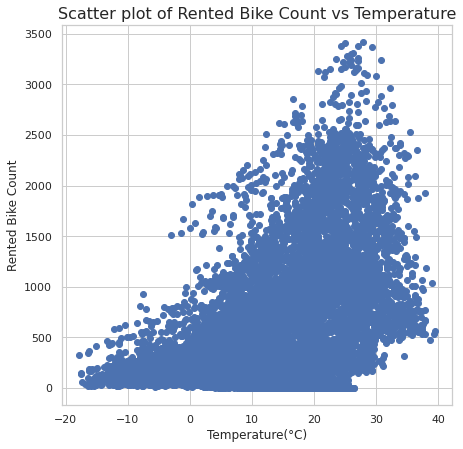

In [291]:
plt.figure(figsize=(7,7))
plt.scatter(dataset['Temperature(°C)'],dataset['Rented Bike Count'])
plt.title("Scatter plot of Rented Bike Count vs Temperature", fontsize=16)
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

We can see there is a positive correlation between rented bike count and temperature.

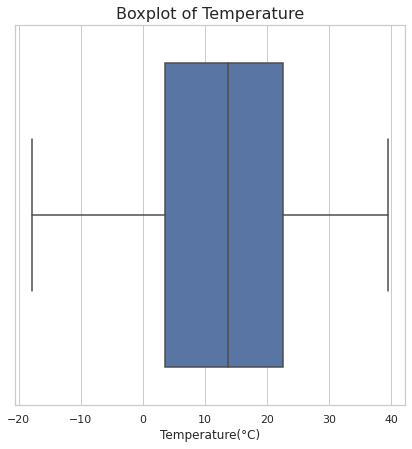

In [292]:
plt.figure(figsize=(7,7))
sns.boxplot(dataset['Temperature(°C)'])
plt.title("Boxplot of Temperature", fontsize=16)
plt.show()

There are no outliers.

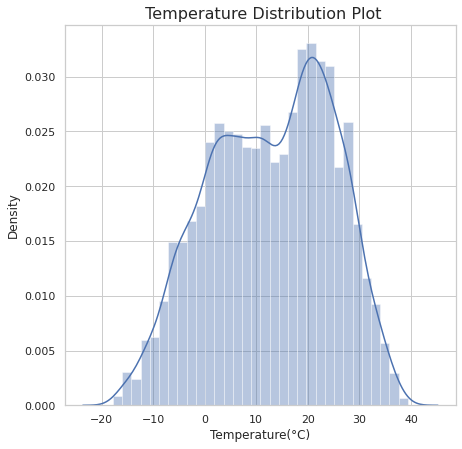

In [293]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['Temperature(°C)'])
plt.title(" Temperature Distribution Plot", fontsize=16)
plt.xlabel('Temperature(°C)')
plt.show()

And the distribution is almost normal.

In [294]:
dataset['Temp'] = dataset['Temperature(°C)'].apply(np.floor)

In [295]:
dataset.groupby('Temp')['Rented Bike Count'].mean().head()

Temp
-18.0    169.250000
-17.0    151.111111
-16.0     84.129032
-15.0     98.631579
-14.0    150.555556
Name: Rented Bike Count, dtype: float64

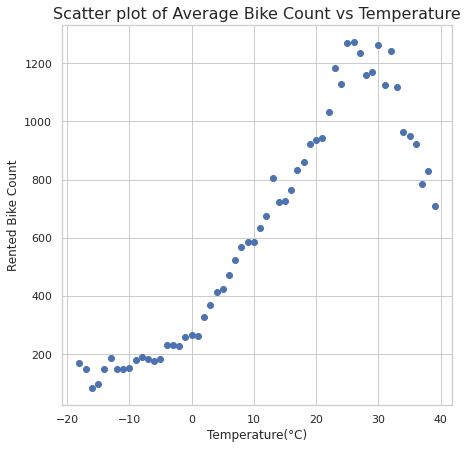

In [296]:
temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Temp')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
temperature_bikecount.rename(columns={'index':'Temperature'},inplace=True)

plt.figure(figsize=(7,7))
plt.scatter(temperature_bikecount['Temperature'],temperature_bikecount['Average Bike Count'])
plt.title("Scatter plot of Average Bike Count vs Temperature", fontsize=16)
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

We can observe that people like to ride bikes mostly during warm temperature. i.e, around 25 degree celsius.

####**Dew point temperature**


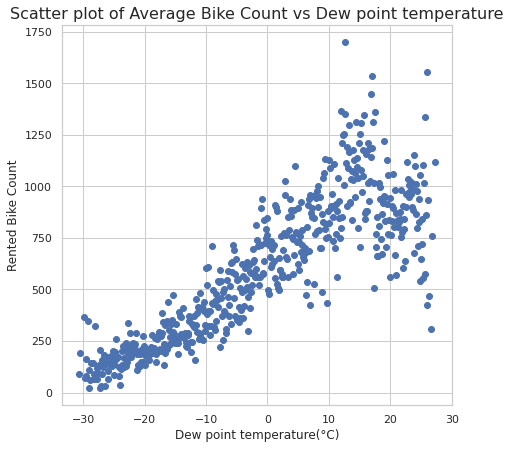

In [297]:
dew_temperature_bikecount=pd.DataFrame(dict(dataset.groupby('Dew point temperature(°C)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
dew_temperature_bikecount.rename(columns={'index':'Dew point temperature(°C)'},inplace=True)

plt.figure(figsize=(7,7))
plt.scatter(dew_temperature_bikecount['Dew point temperature(°C)'],dew_temperature_bikecount['Average Bike Count'])
plt.title("Scatter plot of Average Bike Count vs Dew point temperature", fontsize=16)
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

We can observe that Dew point temperature almost follows Temperature, lets go ahead and plot a graph for Dew point temperature and Temperature to verify.

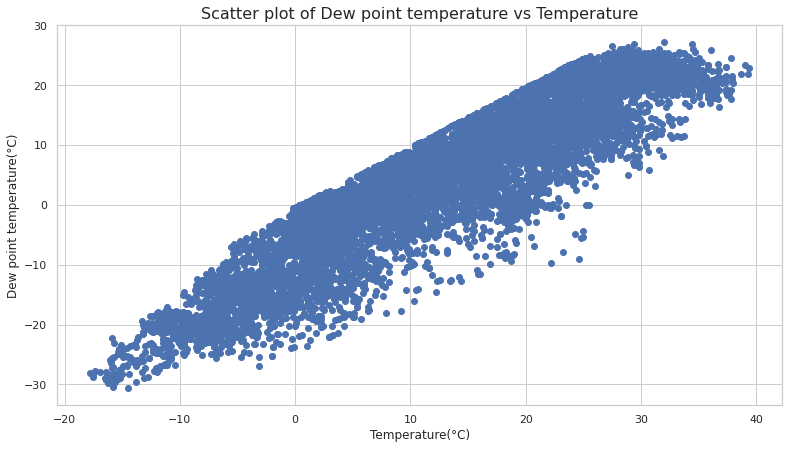

In [298]:
plt.figure(figsize=(13,7))
plt.scatter(dataset['Temperature(°C)'],dataset['Dew point temperature(°C)'])
plt.title("Scatter plot of Dew point temperature vs Temperature", fontsize=16)
plt.ylabel('Dew point temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.show()

We can see there is a linear relation between Temperature and Dew point temperature, since there is a huge correlation, we will keep either of them after analyzing the correlation of each of the with Rented bike count.

####**Humidity**

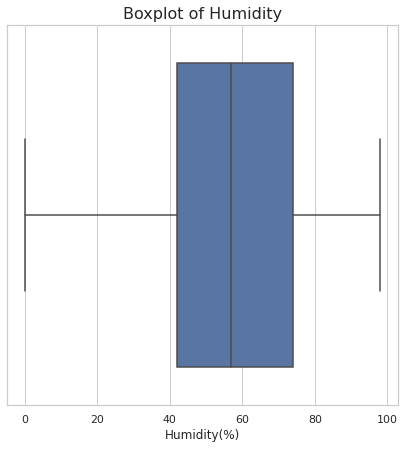

In [299]:
plt.figure(figsize=(7,7))
sns.boxplot(dataset['Humidity(%)'])
plt.title("Boxplot of Humidity",fontsize=16)
plt.show()

There are no outliers.

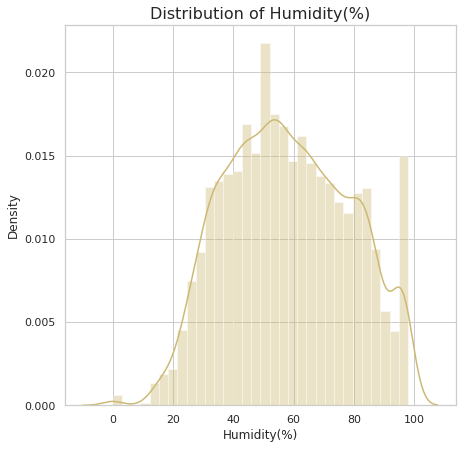

In [300]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['Humidity(%)'], color ='y')
plt.title("Distribution of Humidity(%)",fontsize=16)
plt.show()

The distribution is also almost normal.

In [301]:
humidity_bikecount=pd.DataFrame(dict(dataset.groupby('Humidity(%)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()

In [302]:
humidity_bikecount.rename(columns={'index':'Humidity'},inplace=True)

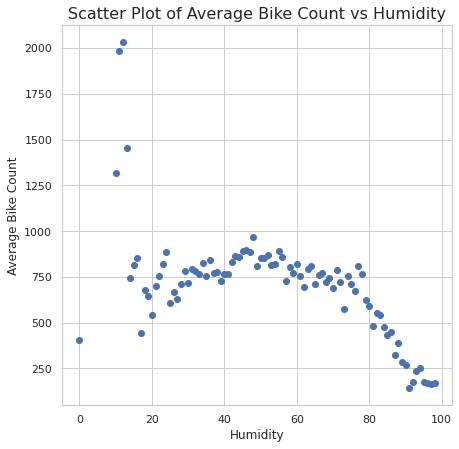

In [303]:
plt.figure(figsize=(7,7))
plt.scatter(humidity_bikecount['Humidity'],humidity_bikecount['Average Bike Count'])
plt.title("Scatter Plot of Average Bike Count vs Humidity",fontsize=16)
plt.xlabel("Humidity")
plt.ylabel("Average Bike Count")
plt.show()

In [304]:
# # lets drop the extreme cases, bike count more than 1250 for humidity less than 20.
# dataset.drop(dataset[(dataset['Humidity(%)']<20) & (dataset['Rented Bike Count']>1250)].index,axis=0,inplace=True)

We can observe that as the humidity rises above 70%, there is a steep decrease in the bike demand.

####**Wind Speed**

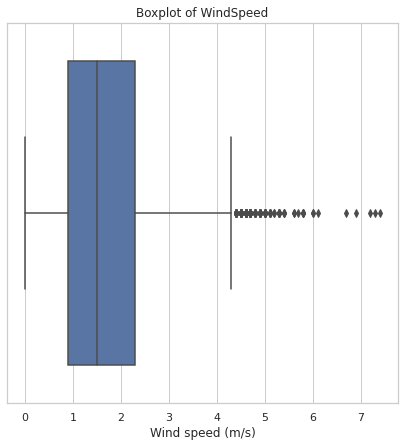

In [305]:
plt.figure(figsize=(7,7))
sns.boxplot(dataset['Wind speed (m/s)'])
plt.title("Boxplot of WindSpeed")
plt.show()

In [306]:
#Considering the value above 6 as an outlier, lets drop it.
dataset.drop(dataset[dataset['Wind speed (m/s)']>6].index,axis=0,inplace=True)

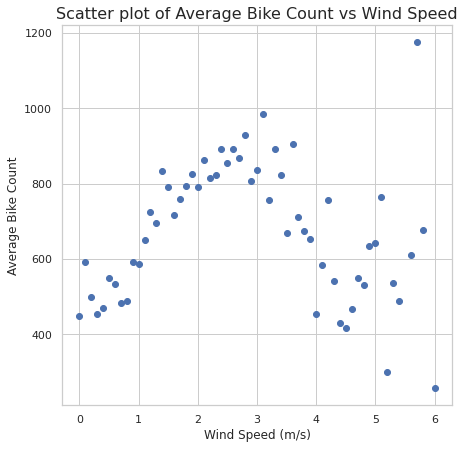

In [307]:
windspeed_bikecount=pd.DataFrame(dict(dataset.groupby('Wind speed (m/s)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
windspeed_bikecount.rename(columns={'index':'Wind speed (m/s)'},inplace=True)

plt.figure(figsize=(7,7))
plt.scatter(windspeed_bikecount['Wind speed (m/s)'],windspeed_bikecount['Average Bike Count'])
plt.title("Scatter plot of Average Bike Count vs Wind Speed",fontsize=16)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Average Bike Count")
plt.show()

We can see there is a sinusoidal relation between Rented Bike Count and Wind speed.

####**Visibility**

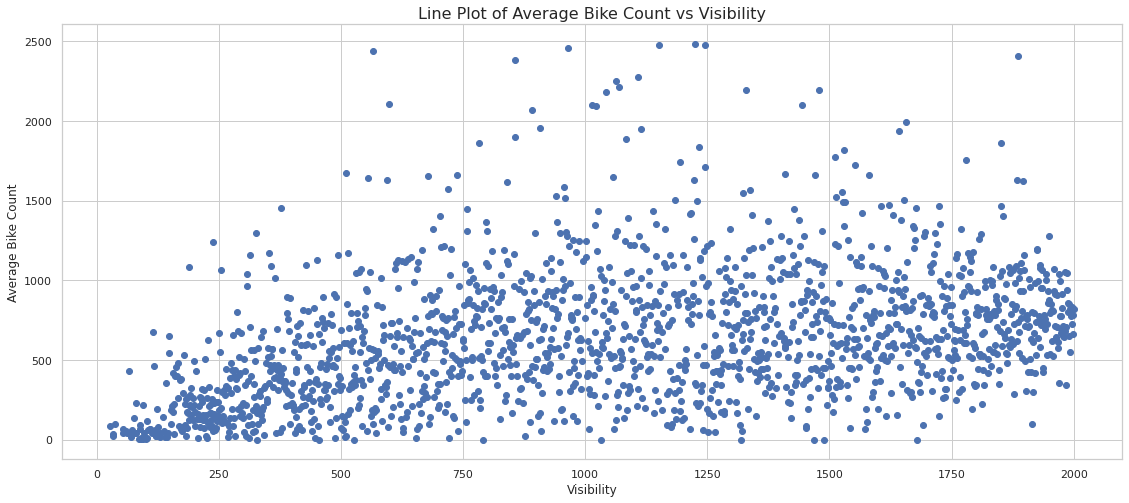

In [308]:
visibility_bikecount=pd.DataFrame(dict(dataset.groupby('Visibility (10m)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
visibility_bikecount.rename(columns={'index':'Visibility (10m)'},inplace=True)

plt.figure(figsize=(19,8))
plt.scatter(visibility_bikecount['Visibility (10m)'],visibility_bikecount['Average Bike Count'])
plt.title("Line Plot of Average Bike Count vs Visibility",fontsize=16)
plt.xlabel("Visibility")
plt.ylabel('Average Bike Count')
plt.show()

We cannot observe any prominent relation between Visibility and the dependent variable Rented Bike Count

So, lets Drop this feature.

In [309]:
dataset.drop('Visibility (10m)',axis=1,inplace=True)

####**Solar Radiation**

Text(0, 0.5, 'Average Bike Count')

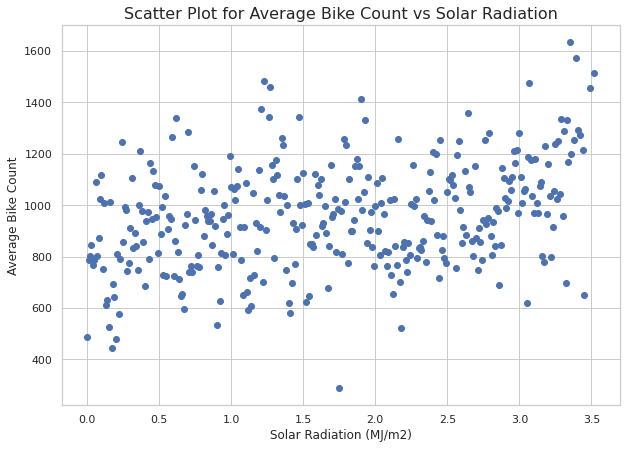

In [310]:
solar_radiation_bikecount=pd.DataFrame(dict(dataset.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
solar_radiation_bikecount.rename(columns={'index':'Solar Radiation (MJ/m2)'},inplace=True)

plt.figure(figsize=(10,7))
plt.scatter(solar_radiation_bikecount['Solar Radiation (MJ/m2)'],solar_radiation_bikecount['Average Bike Count'])
plt.title("Scatter Plot for Average Bike Count vs Solar Radiation",fontsize=16)
plt.xlabel("Solar Radiation (MJ/m2)")
plt.ylabel("Average Bike Count")

We cannot find any relation between Solar Radiation and the dependent variable.

There is no evident relation between solar radiation and rented bikes. But one thing we can observe is that if there is a solar radiation then number of rented bike counts is high. (by observing y -axis)

####**Rainfall and Snowfall**

In [311]:
# (dataset['Snowfall (cm)'].value_counts().head())/len(dataset)*100

In [312]:
# (dataset['Rainfall(mm)'].value_counts().head())/len(dataset)*100

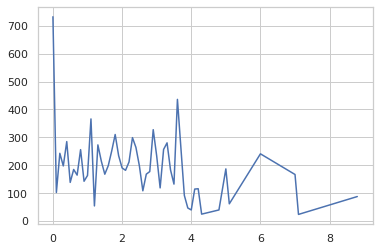

In [313]:
snow_bikecount=pd.DataFrame(dict(dataset.groupby('Snowfall (cm)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
snow_bikecount.rename(columns={'index':'Snowfall (cm)'},inplace=True)
plt.plot(snow_bikecount['Snowfall (cm)'],snow_bikecount['Average Bike Count'])

If the snowfall increases, rental bike count decreases.

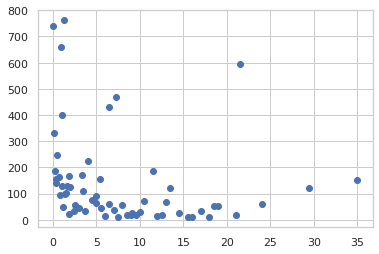

In [314]:
rain_bikecount=pd.DataFrame(dict(dataset.groupby('Rainfall(mm)')['Rented Bike Count'].mean()),index=['Average Bike Count']).transpose().reset_index()
rain_bikecount.rename(columns={'index':'Rainfall(mm)'},inplace=True)
plt.scatter(rain_bikecount['Rainfall(mm)'],rain_bikecount['Average Bike Count'])
plt.show()

As the rainfall increases, rental bikecount decreases.

In [315]:
# cols_to_drop.extend(['Snowfall (cm)','Rainfall(mm)'])

In [316]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekday', 'Temp'],
      dtype='object')

In [317]:
dataset.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temp'],
      dtype='object')

Since "Temp" is created temporarily for EDA of temperature. Let's drop that column.

In [318]:
dataset.drop('Temp',axis=1,inplace=True)

In [319]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [320]:
nf = list(numeric_features)

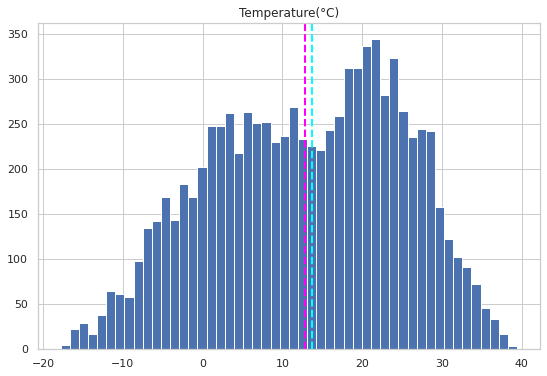

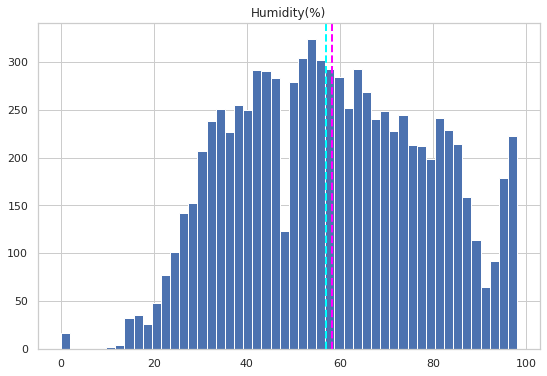

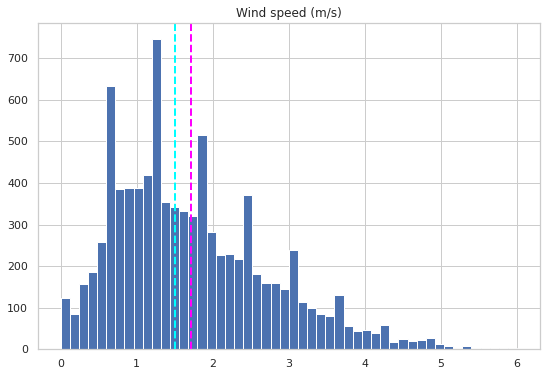

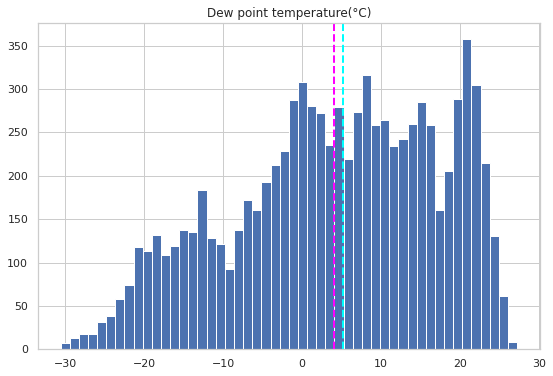

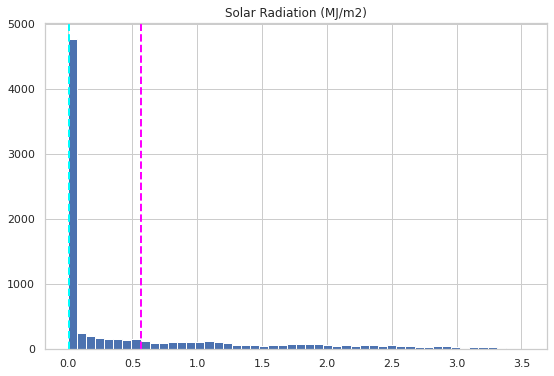

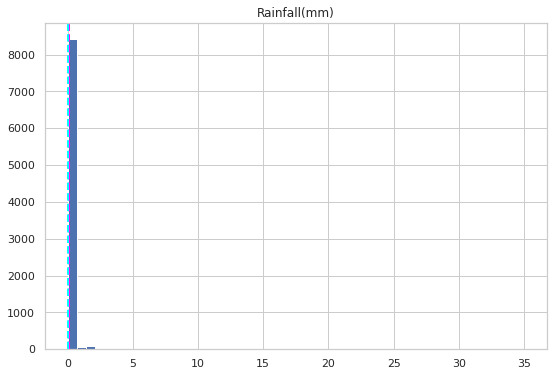

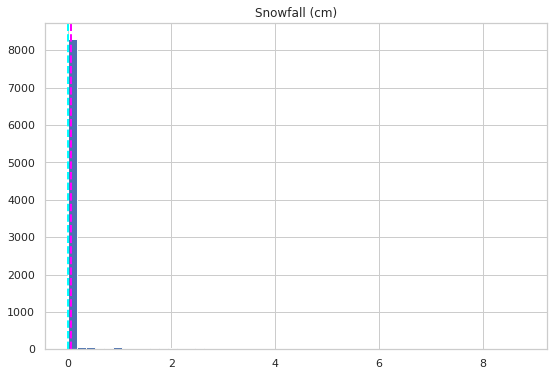

In [321]:
for col in nf[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

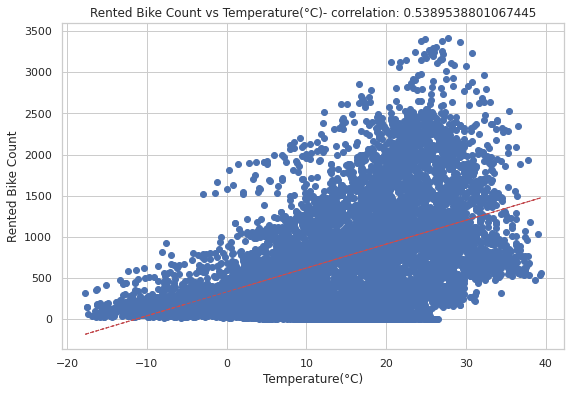

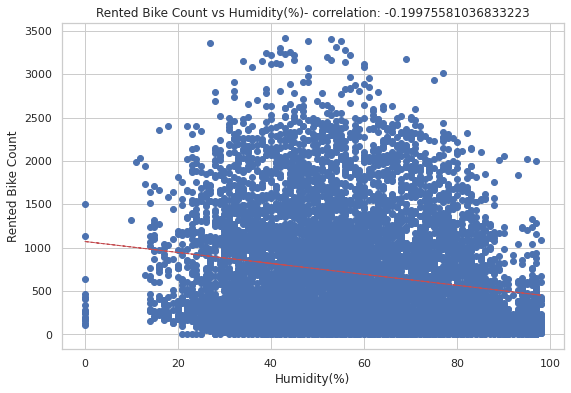

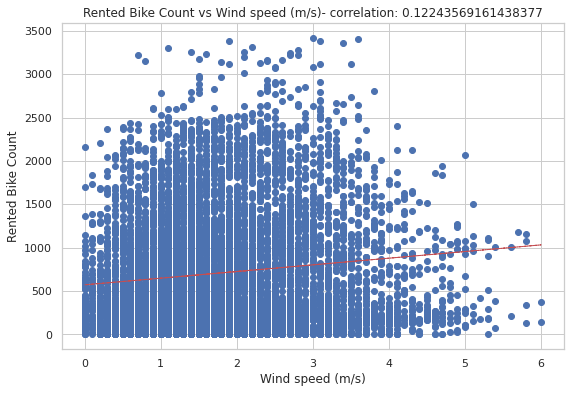

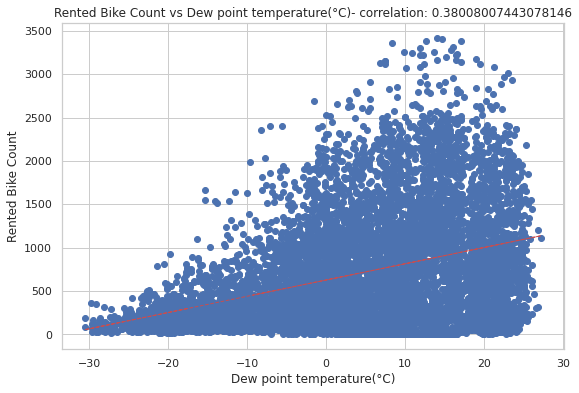

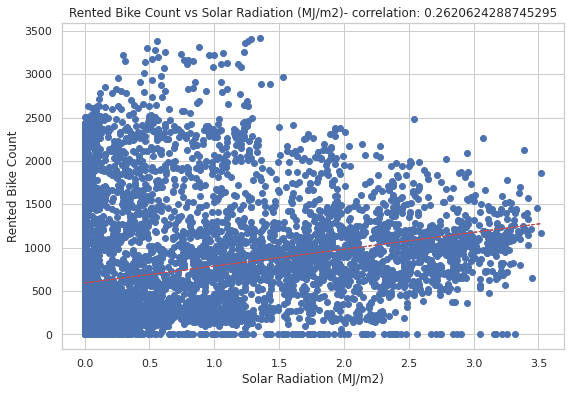

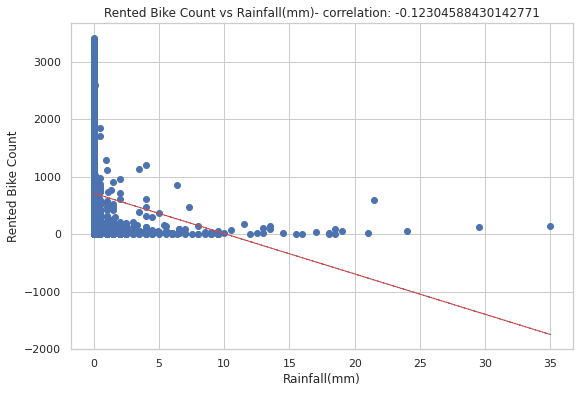

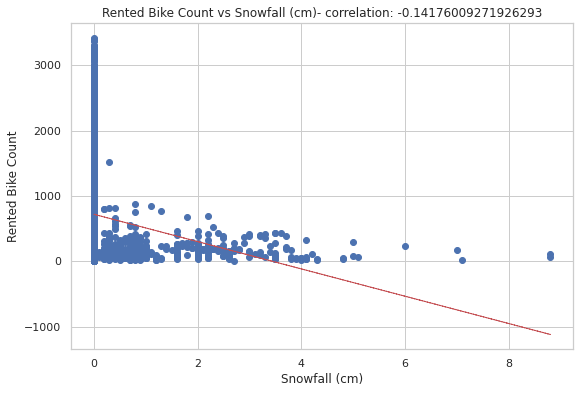

In [322]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()


From the above plots we can observe that - 

"Temperature","Wind speed","Dew point temperature","Solar radiation" are positively correlated means when they increase rented bike count also increases.

"Humidity","Rainfall","Snowfall" are negatively correlated means when they increase rented bike count decreases.

Now Let's plot heat map to see for correlation.

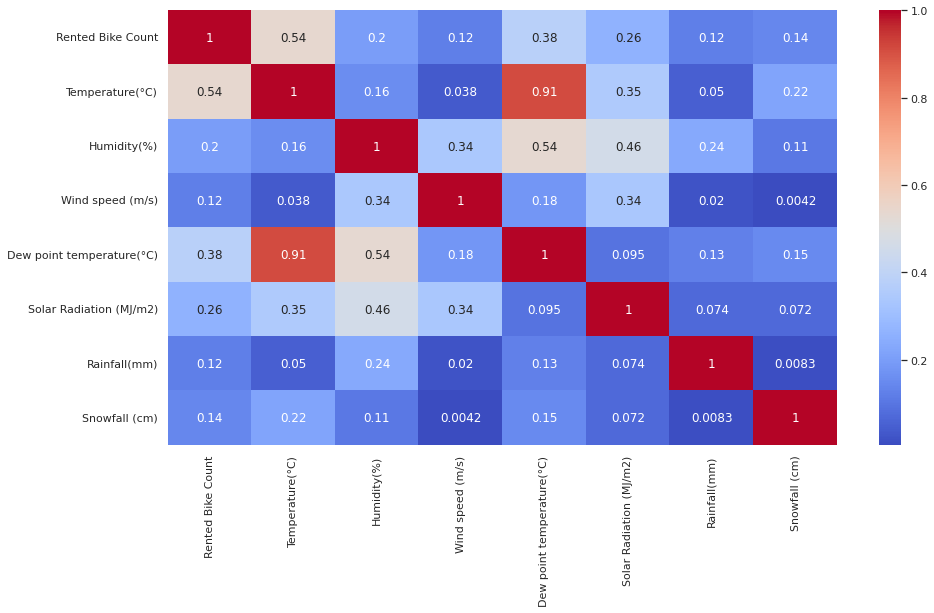

In [323]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Now let's calculate VIF to check for multicollinearity between independent features. And remove them.

In [324]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [325]:
vif_df = calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])
vif_df

,variables,VIF
0,Temperature(°C),3.135510
1,Humidity(%),4.062277
2,Wind speed (m/s),3.301817
3,Solar Radiation (MJ/m2),2.229044
4,Rainfall(mm),1.050038
5,Snowfall (cm),1.114901


The variables we are left with are having VIF less than 5. So, we can say that these are not correlated with each other. 

After all the analysis we are left with these numerical variables.

In [326]:
num_feat = list(vif_df['variables'])
num_feat

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

###Analysis of Categorical variables

In [327]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekday'],
      dtype='object')

####**Hour**


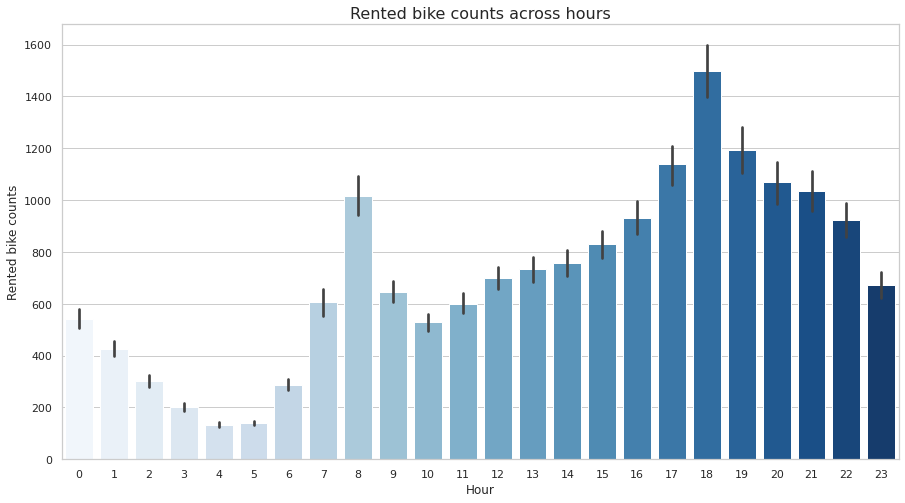

In [328]:
sns.set(style='whitegrid') # adding gridlines in the graphs (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=(15, 8))
plt.title("Rented bike counts across hours", fontsize=16)
ax=sns.barplot(x = dataset['Hour'],y = dataset['Rented Bike Count'],palette="Blues")
plt.xlabel("Hour")
plt.ylabel("Rented bike counts")
plt.show()


We can observe that during working hours/peak hours usuage of rental bikes is more.

####**Month**


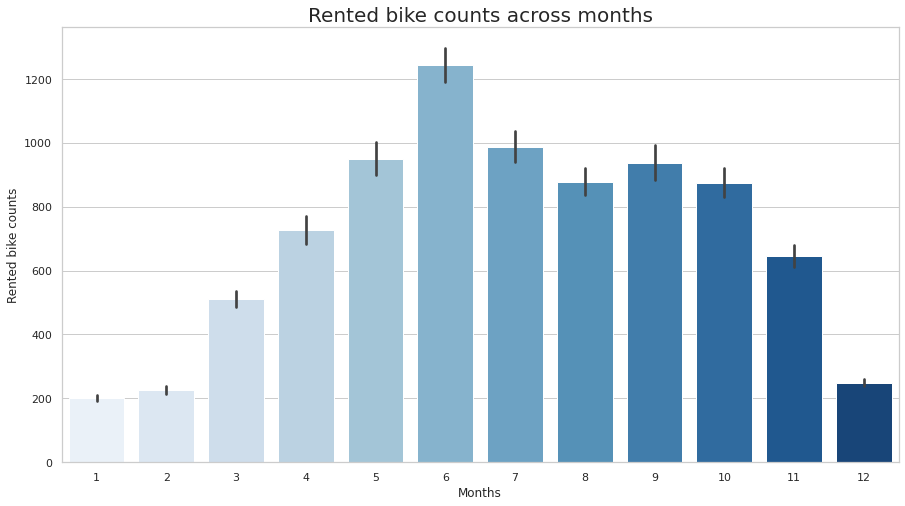

In [329]:
sns.set(style='whitegrid') # adding gridlines in the graphs (white, dark, whitegrid, darkgrid, ticks)
plt.figure(figsize=(15, 8))
plt.title("Rented bike counts across months", fontsize=20)
ax=sns.barplot(x = dataset['month'],y = dataset['Rented Bike Count'],palette="Blues")
plt.xlabel("Months")
plt.ylabel("Rented bike counts")

plt.show()


As we can see the winter season(Dec-Feb) are the dull months for rental bike industry as the temperature falls lower degrees and people tend to stay indoors.

####**Weekday**

In [330]:
dataset['weekday'].value_counts()

1    6257
0    2496
Name: weekday, dtype: int64

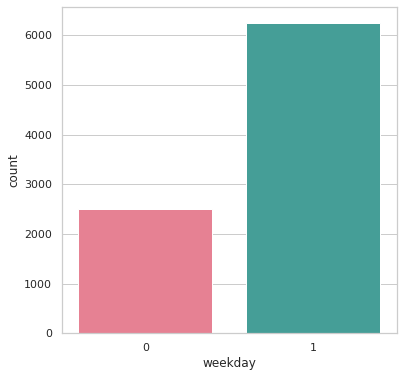

In [331]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(dataset['weekday'], palette='husl')
plt.show()

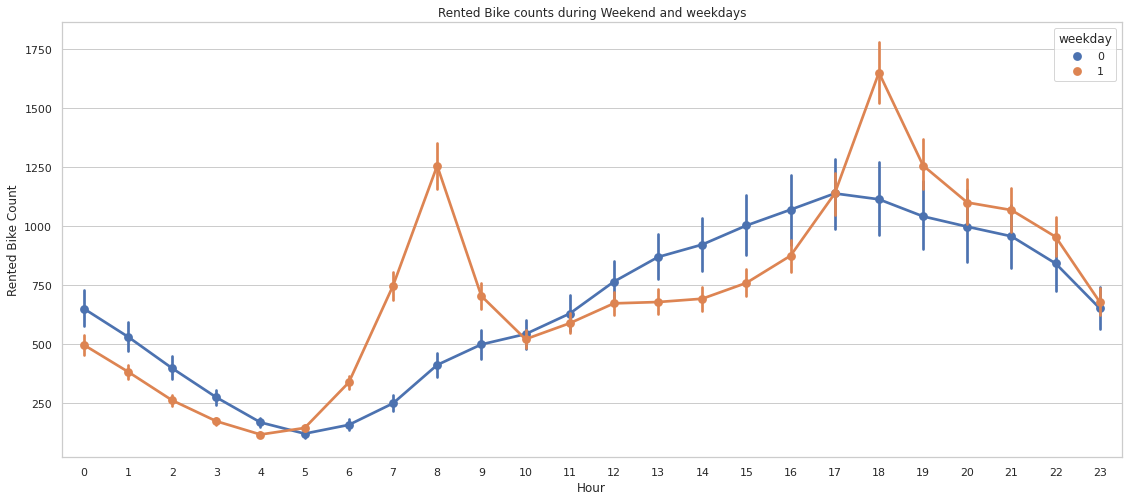

In [332]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='weekday',ax=ax)
ax.set(title='Rented Bike counts during Weekend and weekdays')
plt.show()

From the above plot we can observe that -
In weekdays, rental bike counts will be more during peak/working hours.
And in weekends, rental bike counts will keep on raising during evening times.

####**Seasons**

In [333]:
dataset['Seasons'].value_counts()

Summer    2206
Spring    2204
Autumn    2184
Winter    2159
Name: Seasons, dtype: int64

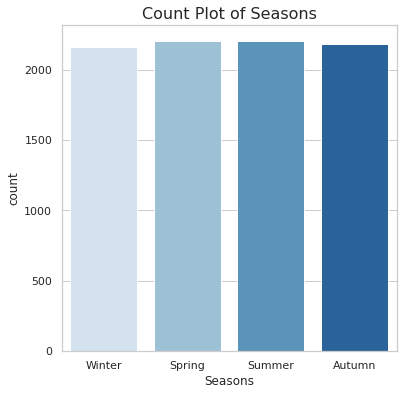

In [334]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(dataset['Seasons'], palette='Blues')
plt.title("Count Plot of Seasons", fontsize=16)
plt.show()

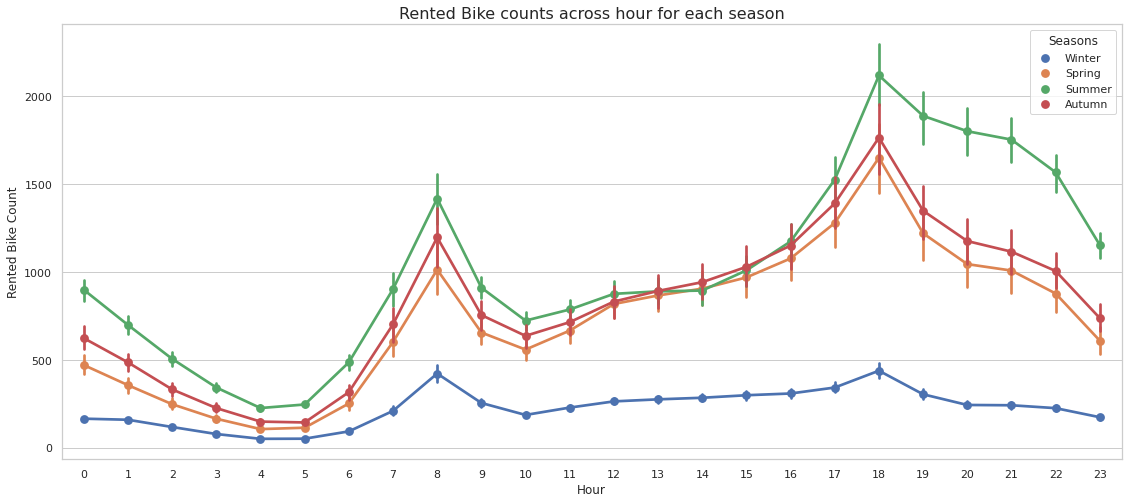

In [335]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)

plt.title('Rented Bike counts across hour for each season', fontsize=16)
plt.show()

From the above chart we can observe that people like to ride bikes more in summer and in winter people usually like to stay indoor. This is what we even observed from "months" column.

####**Holiday**

In [336]:
dataset['Holiday'].value_counts()

No Holiday    8321
Holiday        432
Name: Holiday, dtype: int64

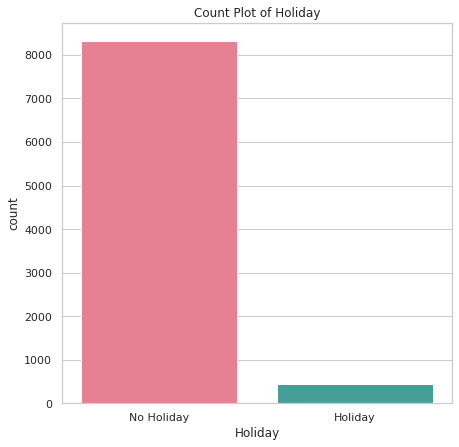

In [337]:
# plotting a bar plot
plt.figure(figsize=(7,7))
sns.countplot(dataset['Holiday'], palette='husl')
plt.title('Count Plot of Holiday')
plt.show()

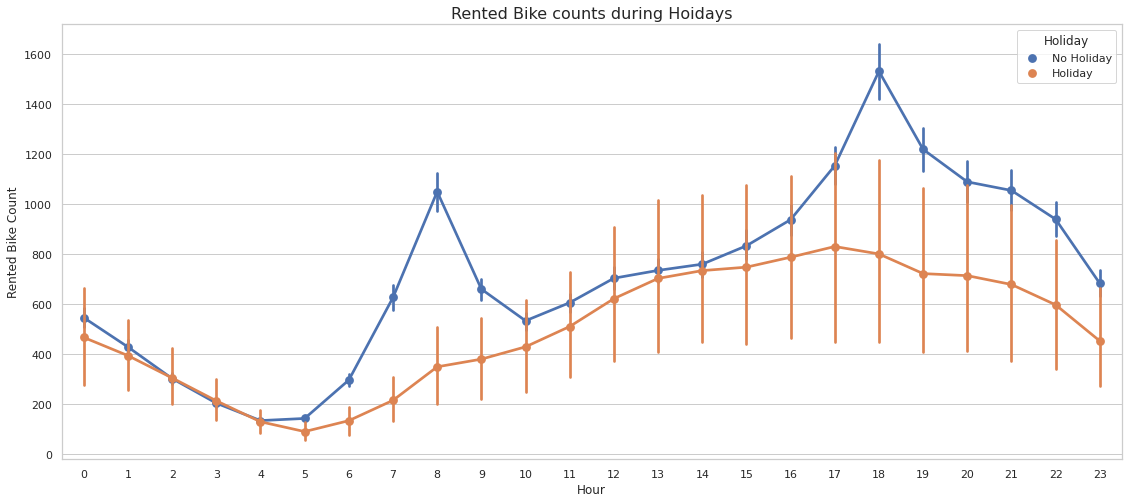

In [338]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
plt.title('Rented Bike counts during Hoidays', fontsize=16)
plt.show()

The amount of people using rental bikes will be less during holidays.

####**Functioning day**

In [339]:
dataset['Functioning Day'].value_counts()

Yes    8458
No      295
Name: Functioning Day, dtype: int64

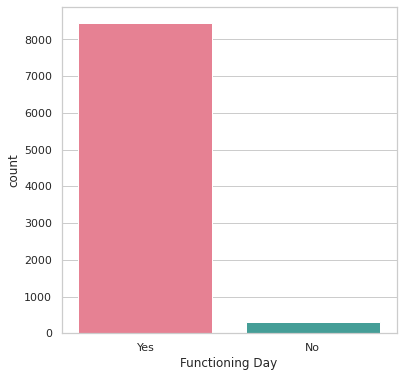

In [340]:
# plotting a bar plot
plt.figure(figsize=(6,6))
sns.countplot(dataset['Functioning Day'], palette='husl')
plt.show()

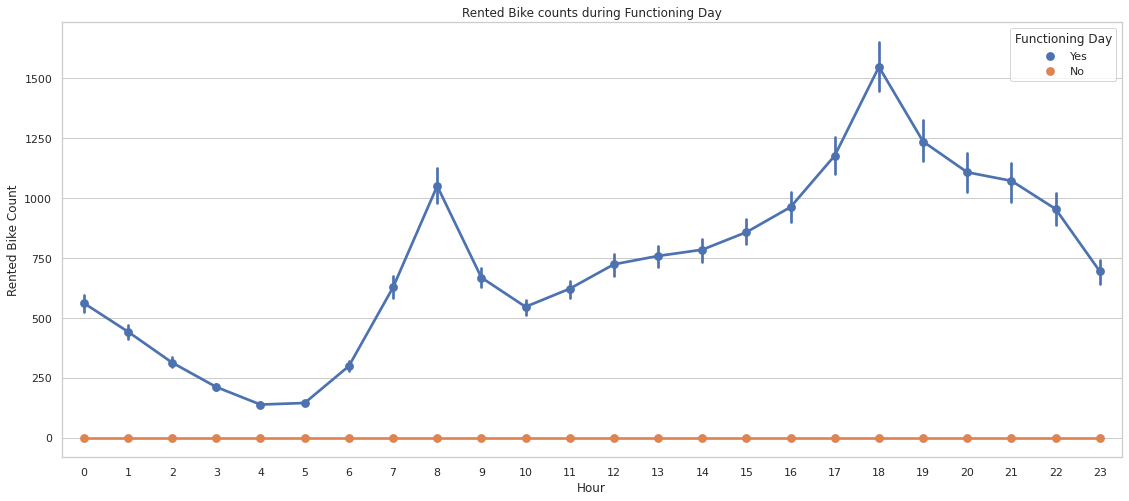

In [341]:
fig,ax=plt.subplots(figsize=(19,8))
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Rented Bike counts during Functioning Day')
plt.show()

From the above chart it is very clear that people don't use rental bikes during Non-functional day.

In [342]:
categorical_features = dataset.describe(include=['object']).columns
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month', 'weekday'], dtype='object')

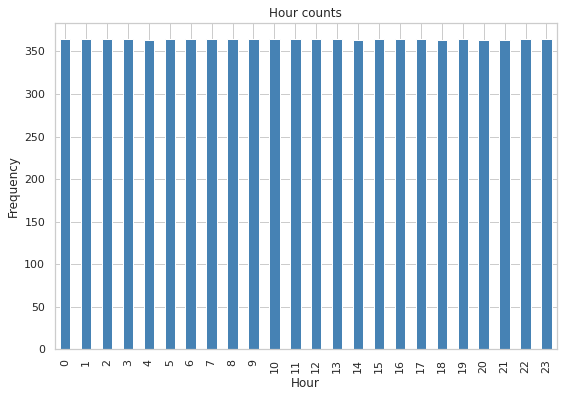

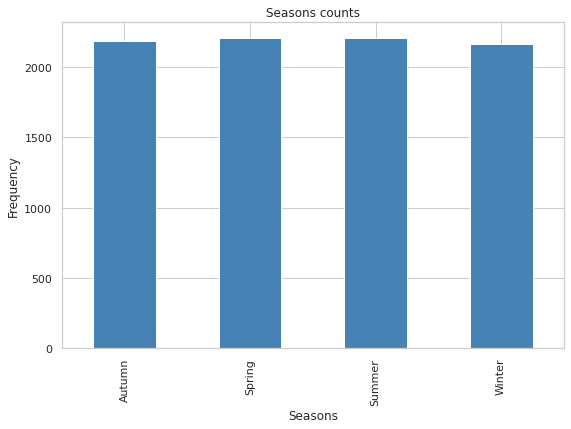

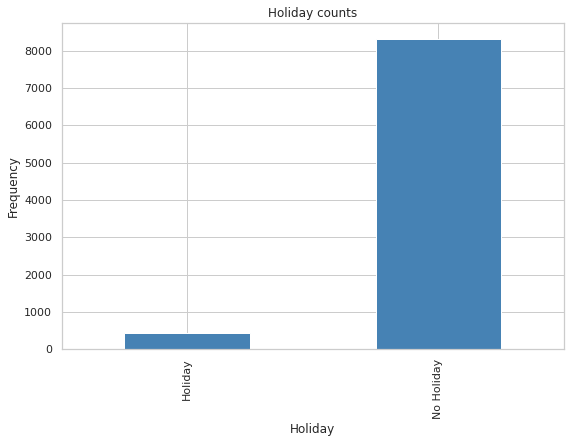

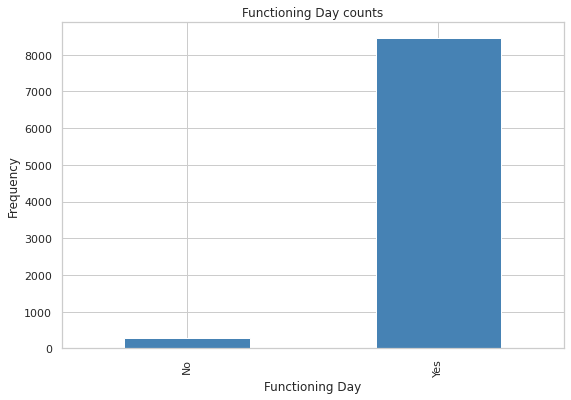

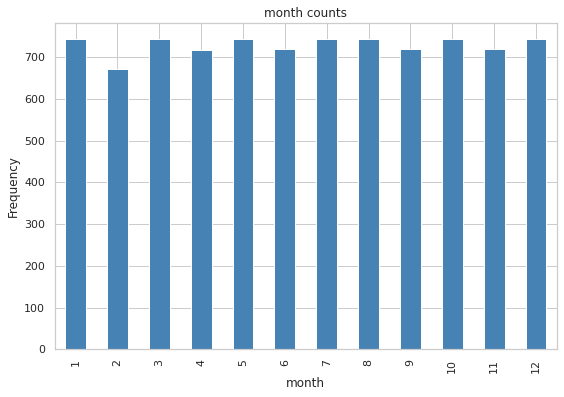

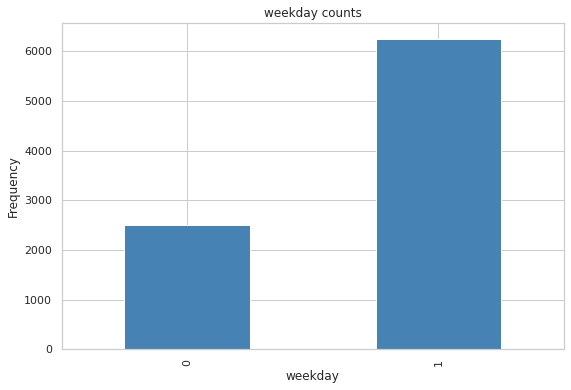

In [343]:
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

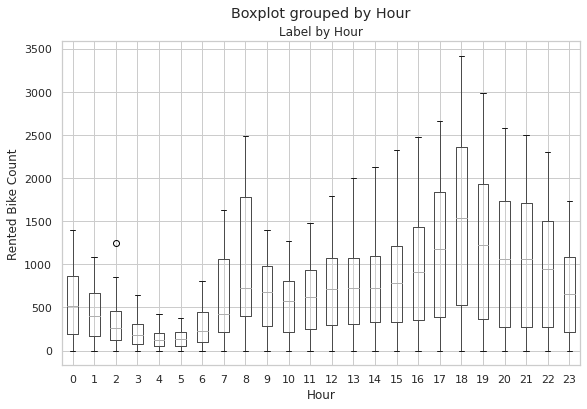

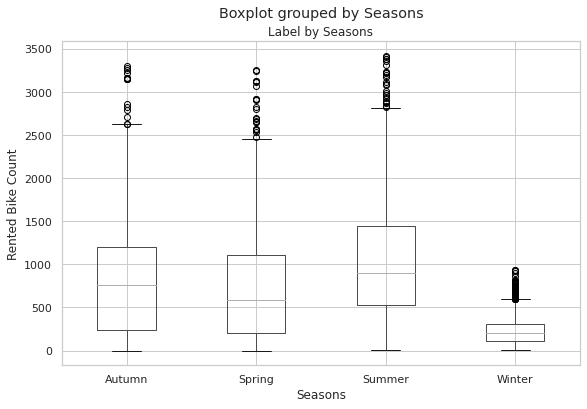

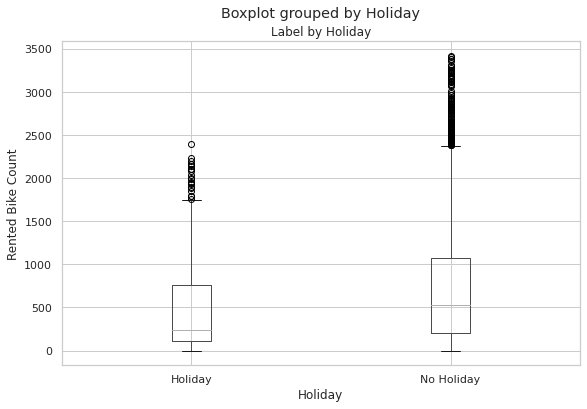

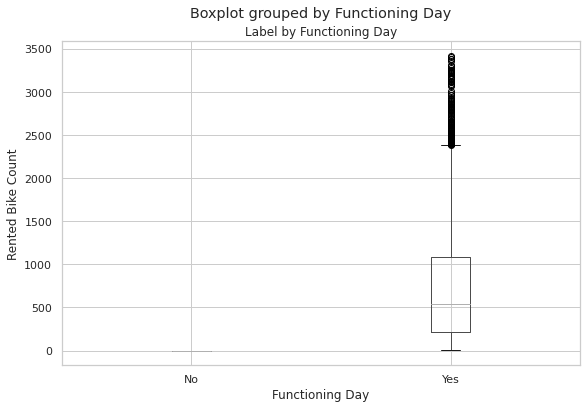

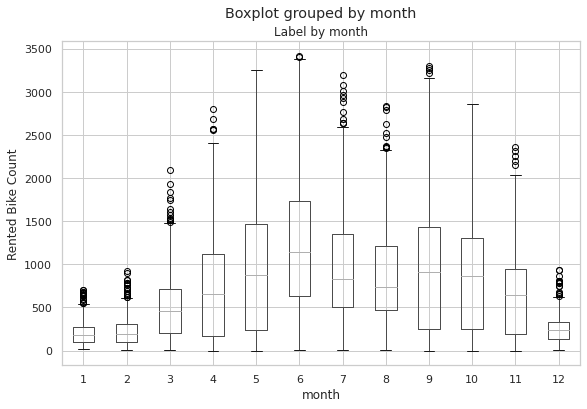

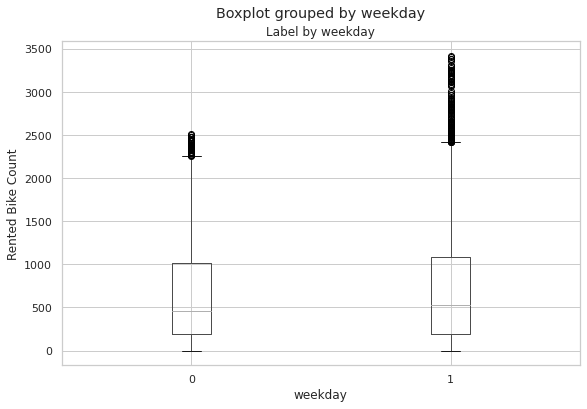

In [344]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()

After analyzing count and box plots, Lets encode our categorical variables.

In [345]:
encoders_nums = {"month":{12:0,1:0,2:0,3:0,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1},
                 "Holiday":{"No Holiday":1,"Holiday":0},"Functioning Day":{"Yes":1,"No":0}}

In [346]:
dataset['Hour'] = dataset['Hour'].replace([1,2,3,4,5,6],1)
dataset['Hour'] = dataset['Hour'].replace([0,7,9,10,11,12,23,13],2)
dataset['Hour'] = dataset['Hour'].replace([8,14,15,16,17,18,19,20,21,22],3)

In [354]:
dataset.isna()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,weekday,season_Autumn,season_Spring,season_Summer,season_Winter
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [350]:
dataset = dataset.replace(encoders_nums)
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekday
0,254,2,-5.2,37,2.2,-17.6,0.0,0.0,0.0,Winter,1,1,0,1
1,204,1,-5.5,38,0.8,-17.6,0.0,0.0,0.0,Winter,1,1,0,1
2,173,1,-6.0,39,1.0,-17.7,0.0,0.0,0.0,Winter,1,1,0,1
3,107,1,-6.2,40,0.9,-17.6,0.0,0.0,0.0,Winter,1,1,0,1
4,78,1,-6.0,36,2.3,-18.6,0.0,0.0,0.0,Winter,1,1,0,1


In [352]:
dataset = pd.get_dummies(dataset, columns=["Seasons"], prefix=["season"])

In [353]:
dataset.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,weekday,season_Autumn,season_Spring,season_Summer,season_Winter
0,254,2,-5.2,37,2.2,-17.6,0.0,0.0,0.0,1,1,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,-17.6,0.0,0.0,0.0,1,1,0,1,0,0,0,1
2,173,1,-6.0,39,1.0,-17.7,0.0,0.0,0.0,1,1,0,1,0,0,0,1
3,107,1,-6.2,40,0.9,-17.6,0.0,0.0,0.0,1,1,0,1,0,0,0,1
4,78,1,-6.0,36,2.3,-18.6,0.0,0.0,0.0,1,1,0,1,0,0,0,1


In [355]:
features = list(dataset.columns)
features.remove('Rented Bike Count')
features.remove('Dew point temperature(°C)')
# features.remove('month')
# features.remove('Rainfall(mm)')
# features.remove('Snowfall (cm)')
# features.remove('Wind speed (m/s)')
# features.remove('year')
# features.remove('Visibility (10m)')
# features.remove('Humidity')
# features.remove('Solar Radiation (MJ/m2)')
# features.remove('Temp')

In [356]:
features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Functioning Day',
 'month',
 'weekday',
 'season_Autumn',
 'season_Spring',
 'season_Summer',
 'season_Winter']

In [357]:
len(features)

15

#**Training Model and Evaluation**

In [361]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8753 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8753 non-null   int64  
 1   Hour                       8753 non-null   int64  
 2   Temperature(°C)            8753 non-null   float64
 3   Humidity(%)                8753 non-null   int64  
 4   Wind speed (m/s)           8753 non-null   float64
 5   Dew point temperature(°C)  8753 non-null   float64
 6   Solar Radiation (MJ/m2)    8753 non-null   float64
 7   Rainfall(mm)               8753 non-null   float64
 8   Snowfall (cm)              8753 non-null   float64
 9   Holiday                    8753 non-null   int64  
 10  Functioning Day            8753 non-null   int64  
 11  month                      8753 non-null   int64  
 12  weekday                    8753 non-null   int64  
 13  season_Autumn              8753 non-null   uint8

In [360]:
cols=['weekday']
for col in cols:
  dataset[col]=dataset[col].astype('int64')

In [363]:
from scipy.stats import zscore
X = dataset[features].apply(zscore)

In [364]:
y = np.sqrt(dataset['Rented Bike Count'])

In [365]:
X.isna()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,weekday,season_Autumn,season_Spring,season_Summer,season_Winter
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Let's split our data into Train dataset and Test dataset.

In [366]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7002, 15)
(1751, 15)


###Linear Regression

In [368]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [369]:
reg.score(X_train, y_train)

0.7097917862695322

In [370]:
y_pred = reg.predict(X_test)

In [371]:
y_pred

array([24.70608159,  7.04580088, 35.06038313, ..., 23.83559174,
        3.95657716, 13.8943752 ])

In [372]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 155172.97221835208
RMSE : 393.920007385195


In [373]:
y_pred_train = reg.predict(X_train)

In [374]:
from sklearn.metrics import r2_score
r2 = r2_score((y_train)**2, (y_pred_train)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train)**2, (y_pred_train)**2))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

R2 : 0.656537583863285
Adjusted R2 :  0.6558001180399167


In [375]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.6408853379749007
Adjusted R2 :  0.6377806002628681


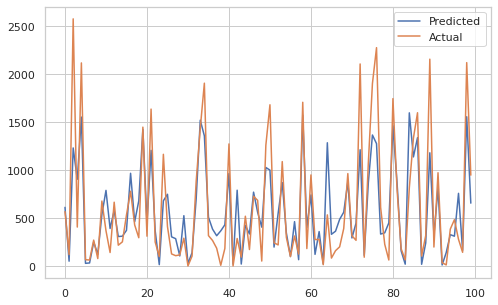

In [376]:
plt.figure(figsize=(8,5))
plt.plot((y_pred[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.show()